This notebook is the summamtion of all work carried out in the Data mining project presented in an organized manner.

**1. load imports**

In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from scipy.stats import spearmanr
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import decomposition, datasets
from sklearn.metrics import f1_score
import time
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

**2.Load Dataset**

In [ ]:
df = pd.read_csv('train with label.csv', error_bad_lines=False)

test = pd.read_csv('test_values.csv')
test_building_id = test["building_id"]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


**3.Exploring Data Types**

In [ ]:
df.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
260596    False
260597    False
260598    False
260599    False
260600    False
Length: 260601, dtype: bool

**4. Count of each damage grade**

In [ ]:
df.groupby('damage_grade').size()

damage_grade
1     25124
2    148259
3     87218
dtype: int64

**5. Visualization of damage grade**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


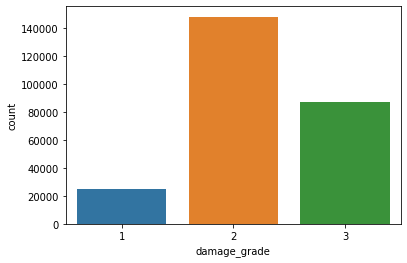

In [ ]:
sns.countplot(df['damage_grade'],label="Count")

**6. Exploring numerical features**

In [ ]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


**7. Exploring categorical features**

In [ ]:
df.describe(include="object").T

,count,unique,top,freq
land_surface_condition,260601,3,t,216757
foundation_type,260601,5,r,219196
roof_type,260601,3,n,182842
ground_floor_type,260601,5,f,209619
other_floor_type,260601,4,q,165282
position,260601,4,s,202090
plan_configuration,260601,10,d,250072
legal_ownership_status,260601,4,v,250939


**8. Exploring feature values and Null values**

In [ ]:
dtypes=pd.DataFrame(df.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=df.nunique()
dtypes["Null Values"]=df.isnull().sum()
dtypes["% null Values"]=df.isnull().sum()/len(df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
building_id,int64,260601,0,0.000000
geo_level_1_id,int64,31,0,0.000000
geo_level_2_id,int64,1414,0,0.000000
geo_level_3_id,int64,11595,0,0.000000
count_floors_pre_eq,int64,9,0,0.000000
age,int64,42,0,0.000000
area_percentage,int64,84,0,0.000000
height_percentage,int64,27,0,0.000000
land_surface_condition,object,3,0,0.000000
foundation_type,object,5,0,0.000000


**9. Removing nulls**

In [ ]:
df = df.dropna()

**10. Visual representation of feature distribution among target classes**

10.1 count_floors_pre_eq - most affected are buildings with 2 floors

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


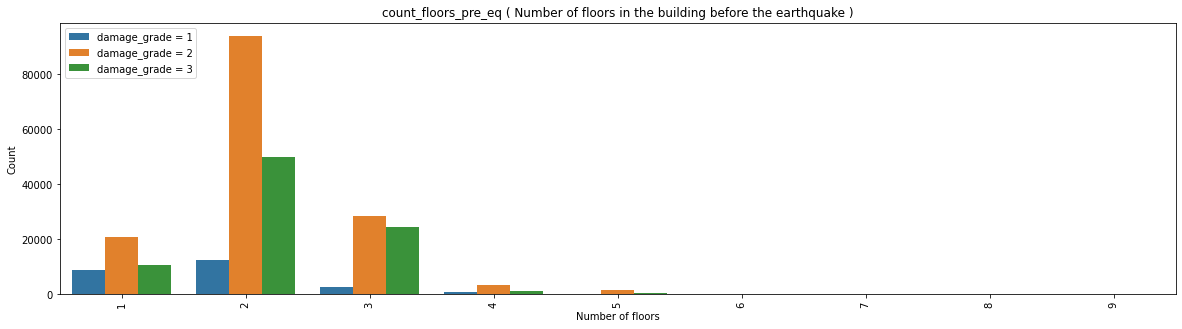

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["count_floors_pre_eq"], hue=df["damage_grade"])
plt.ylabel("Count")
plt.xlabel("Number of floors")
plt.xticks(rotation=90)
plt.title("count_floors_pre_eq ( Number of floors in the building before the earthquake )")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

10.2 Age - Newer buildings are more affected 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


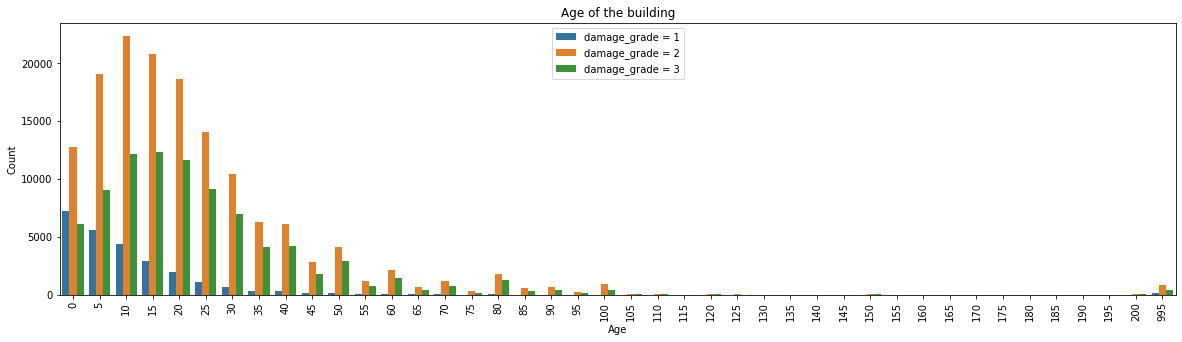

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["age"], hue=df["damage_grade"])
plt.ylabel("Count")
plt.xlabel("Age")
plt.xticks(rotation=90)
plt.title("Age of the building")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

10.3 area_percentage 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


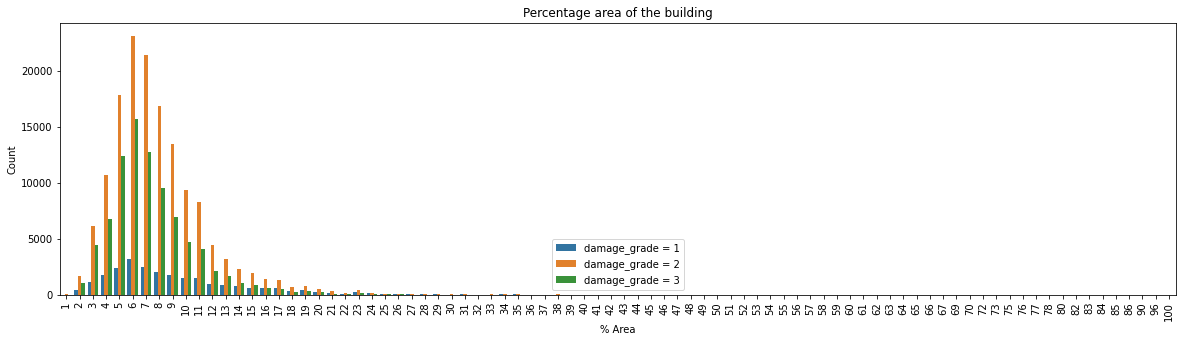

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["area_percentage"], hue=df["damage_grade"])
plt.ylabel("Count")
plt.xlabel("% Area")
plt.xticks(rotation=90)
plt.title("Percentage area of the building")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

10.4 height_percentage

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


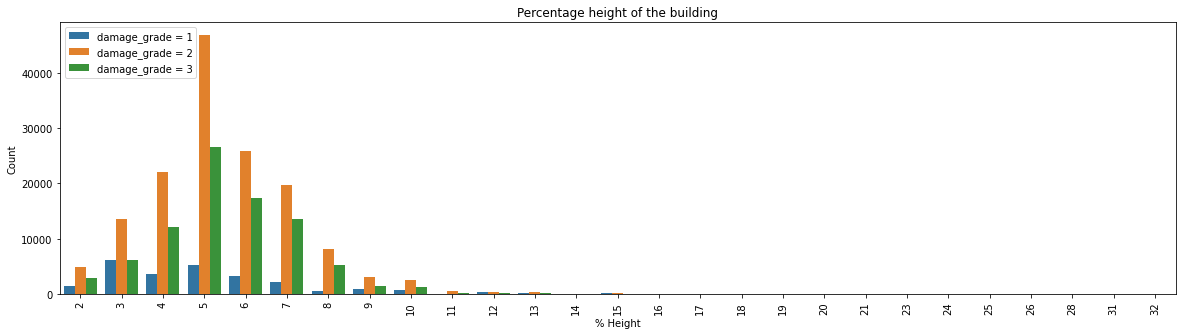

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["height_percentage"], hue=df["damage_grade"])
plt.ylabel("Count")
plt.xlabel("% Height")
plt.xticks(rotation=90)
plt.title("Percentage height of the building")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

10.5 land_surface_condition

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


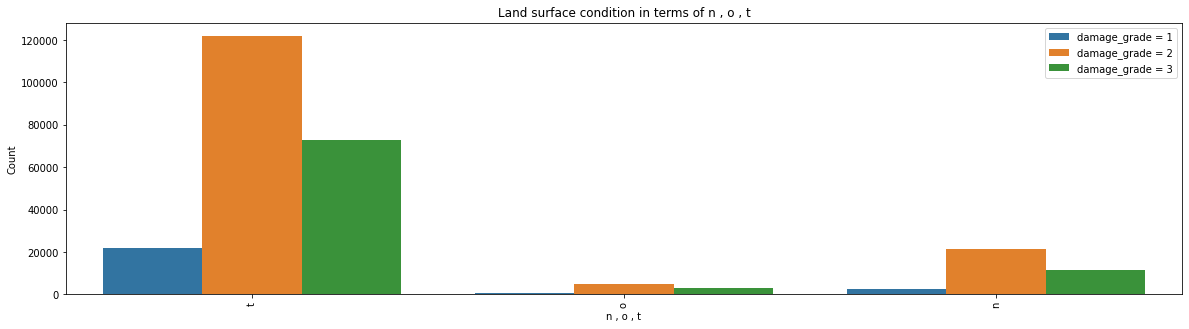

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["land_surface_condition"], hue=df["damage_grade"])
plt.ylabel("Count")
plt.xlabel("n , o , t")
plt.xticks(rotation=90)
plt.title("Land surface condition in terms of n , o , t")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

10.6 foundation_type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


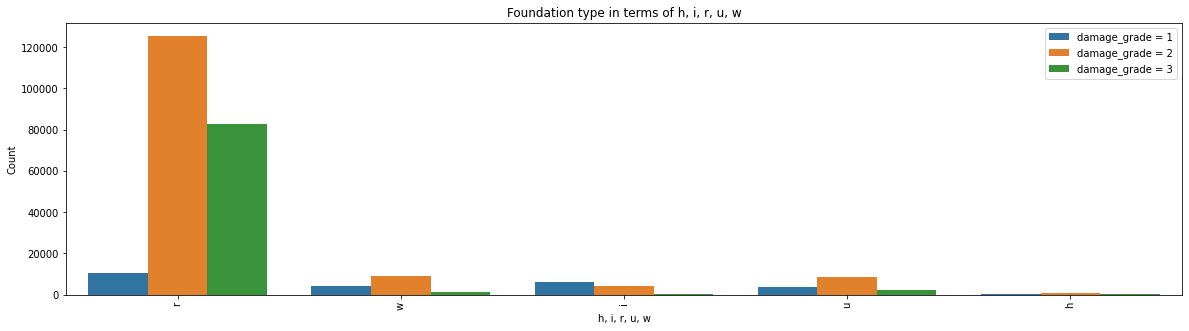

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["foundation_type"], hue=df["damage_grade"])
plt.ylabel("Count")
plt.xlabel("h, i, r, u, w")
plt.xticks(rotation=90)
plt.title("Foundation type in terms of h, i, r, u, w")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

10.7 roof_type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


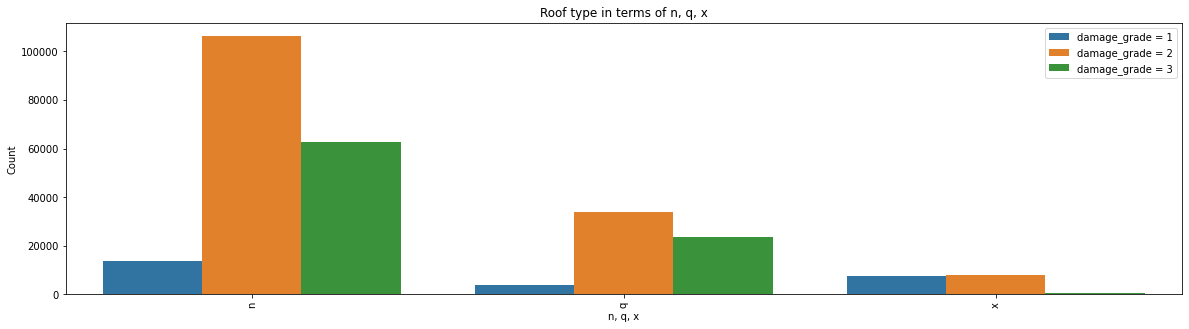

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["roof_type"], hue=df["damage_grade"])
plt.ylabel("Count")
plt.xlabel("n, q, x")
plt.xticks(rotation=90)
plt.title("Roof type in terms of n, q, x")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

10.8 ground_floor_type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


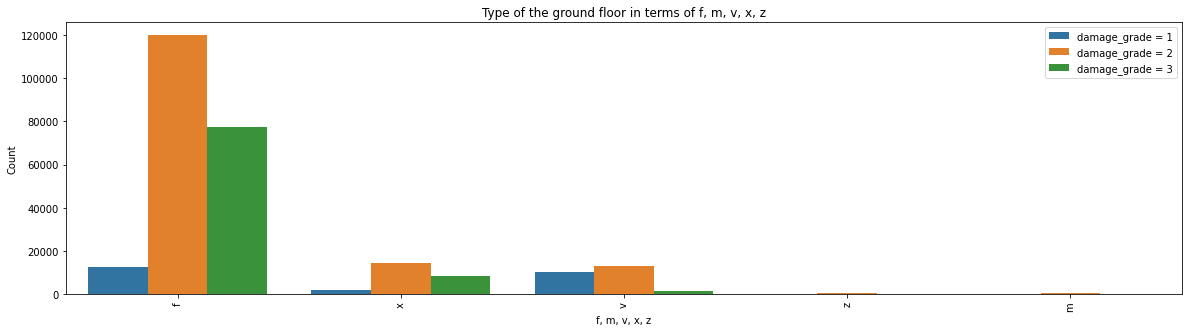

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["ground_floor_type"], hue=df["damage_grade"])
plt.ylabel("Count")
plt.xlabel("f, m, v, x, z")
plt.xticks(rotation=90)
plt.title("Type of the ground floor in terms of f, m, v, x, z")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

10.10 other_floor_type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


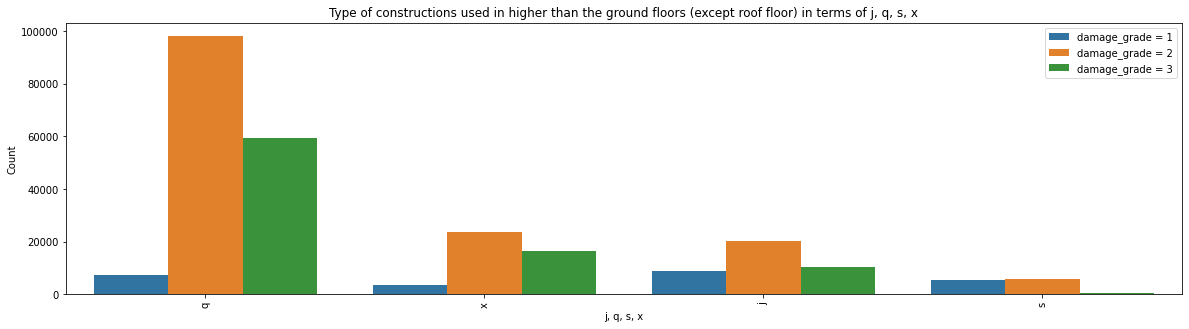

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["other_floor_type"], hue=df["damage_grade"])
plt.ylabel("Count")
plt.xlabel("j, q, s, x")
plt.xticks(rotation=90)
plt.title("Type of constructions used in higher than the ground floors (except roof floor) in terms of j, q, s, x")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

10.11 position

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


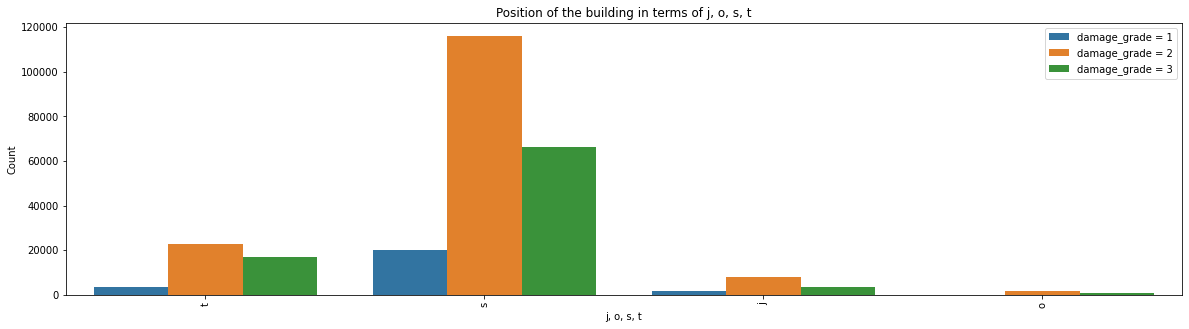

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["position"], hue=df["damage_grade"])
plt.ylabel("Count")
plt.xlabel("j, o, s, t")
plt.xticks(rotation=90)
plt.title("Position of the building in terms of j, o, s, t")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

10.12 plan_configuration

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


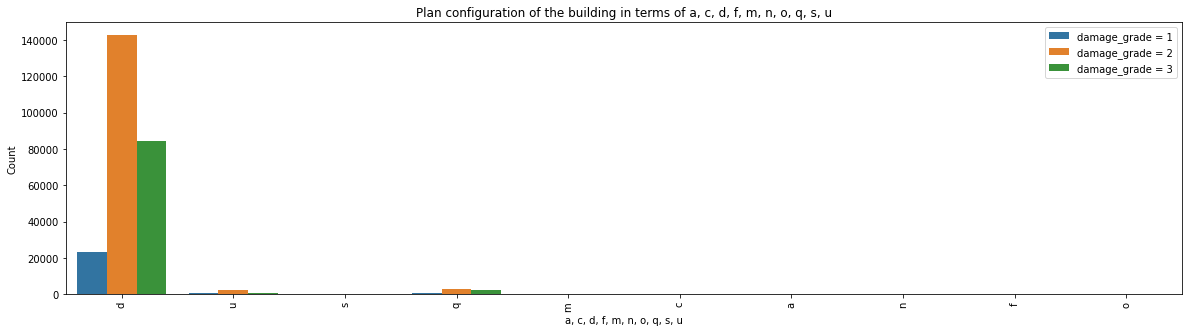

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["plan_configuration"], hue=df["damage_grade"])
plt.ylabel("Count")
plt.xlabel("a, c, d, f, m, n, o, q, s, u")
plt.xticks(rotation=90)
plt.title("Plan configuration of the building in terms of a, c, d, f, m, n, o, q, s, u")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

10.13 count_families

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


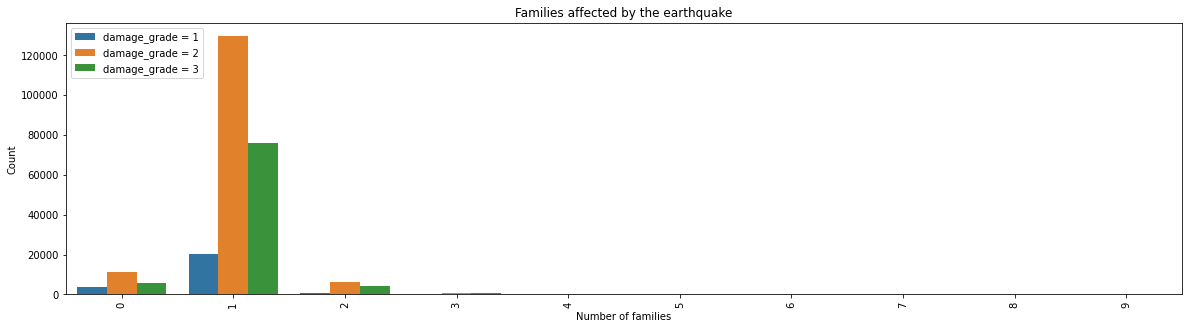

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["count_families"], hue=df["damage_grade"])
plt.ylabel("Count")
plt.xlabel("Number of families")
plt.xticks(rotation=90)
plt.title("Families affected by the earthquake")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

10.14 rest of features 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

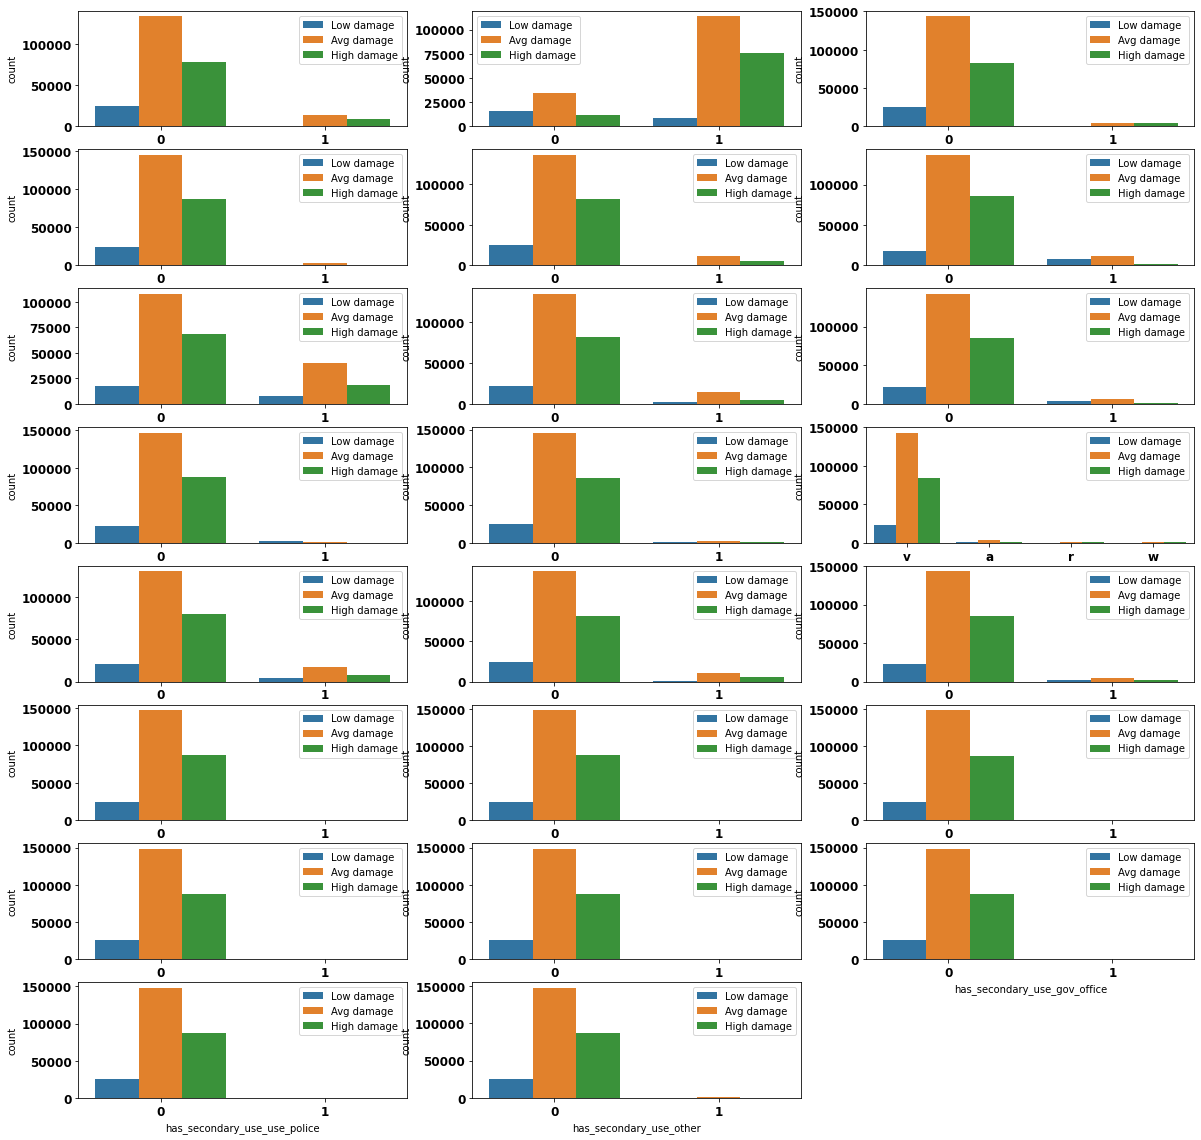

In [ ]:
cols = ['has_superstructure_adobe_mud' , 'has_superstructure_mud_mortar_stone' , 'has_superstructure_stone_flag' , 'has_superstructure_cement_mortar_stone' , 'has_superstructure_mud_mortar_brick' , 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber' , 'has_superstructure_bamboo' , 'has_superstructure_rc_non_engineered' , 'has_superstructure_rc_engineered' , 'has_superstructure_other' , 'legal_ownership_status' , 'has_secondary_use' , 'has_secondary_use_agriculture' , 'has_secondary_use_hotel' ,'has_secondary_use_rental' , 'has_secondary_use_institution' , 'has_secondary_use_school' , 'has_secondary_use_industry', 'has_secondary_use_health_post' , 'has_secondary_use_gov_office' , 'has_secondary_use_use_police' , 'has_secondary_use_other']
font={'weight' : 'bold',
        'size': 12}       
q=1
plt.figure(figsize=(20,20))
for j in cols:
    plt.subplot(8,3,q)
    ax=sns.countplot(df[j].dropna(),hue=df["damage_grade"])
    plt.xticks(**font)
    plt.yticks(**font)
    plt.xlabel(j)
    plt.legend(["Low damage","Avg damage","High damage"])
    q+=1
plt.show()

10.15 rest of features 2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

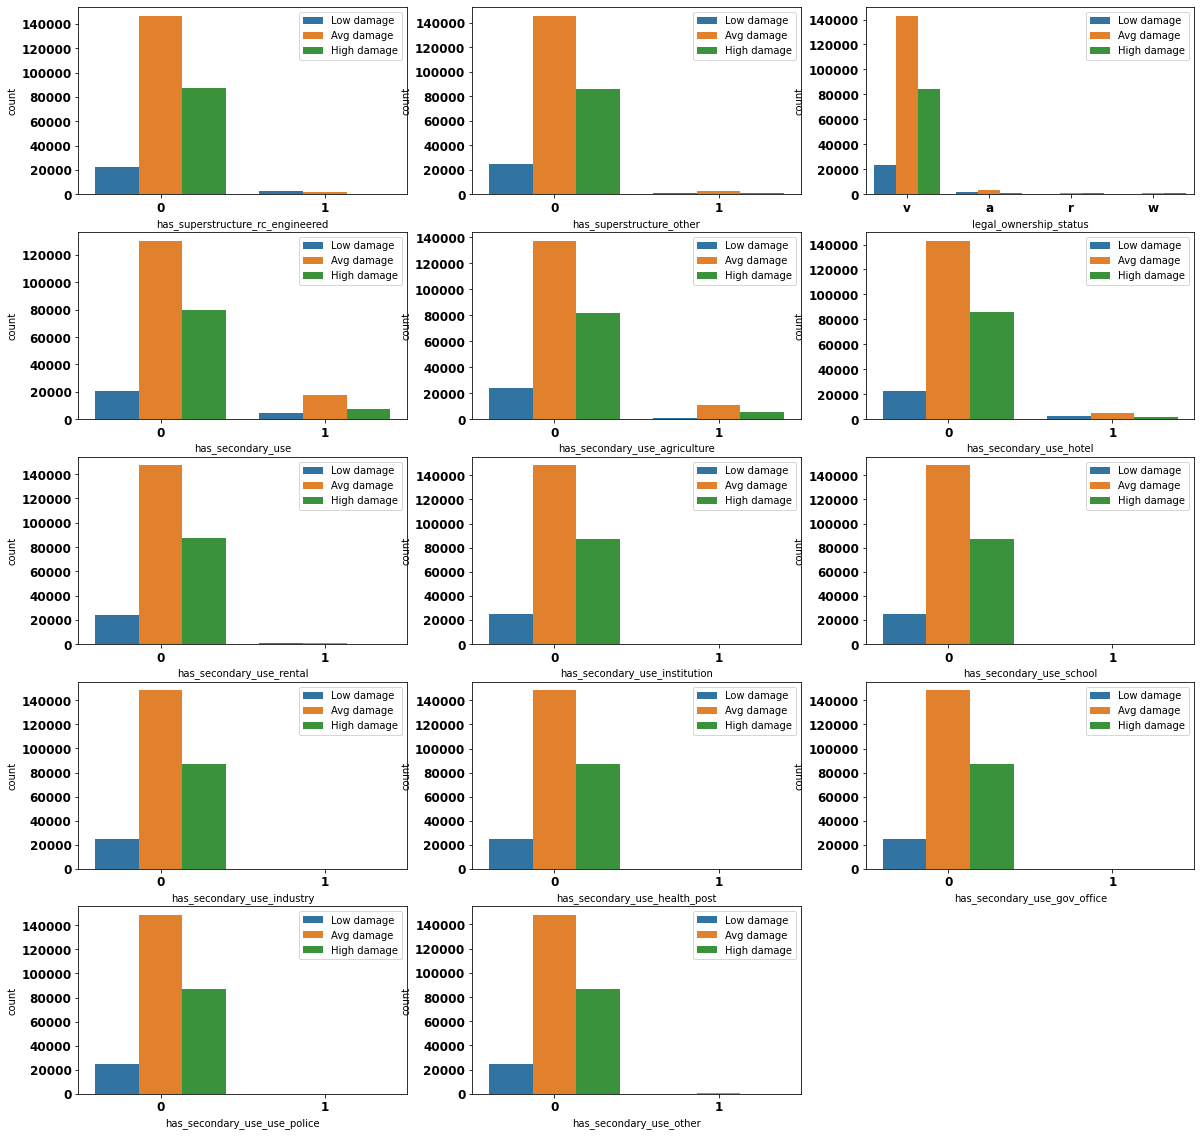

In [ ]:
cols = ['has_superstructure_rc_engineered' , 'has_superstructure_other' , 'legal_ownership_status' , 'has_secondary_use' , 'has_secondary_use_agriculture' , 'has_secondary_use_hotel' ,'has_secondary_use_rental' , 'has_secondary_use_institution' , 'has_secondary_use_school' , 'has_secondary_use_industry', 'has_secondary_use_health_post' , 'has_secondary_use_gov_office' , 'has_secondary_use_use_police' , 'has_secondary_use_other']
font={'weight' : 'bold',
        'size': 12}       
q=1
plt.figure(figsize=(20,20))
for j in cols:
    plt.subplot(5,3,q)
    ax=sns.countplot(df[j].dropna(),hue=df["damage_grade"])
    plt.xticks(**font)
    plt.yticks(**font)
    plt.xlabel(j)
    plt.legend(["Low damage","Avg damage","High damage"])
    q+=1
plt.show()

***11. Outlier exploration***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

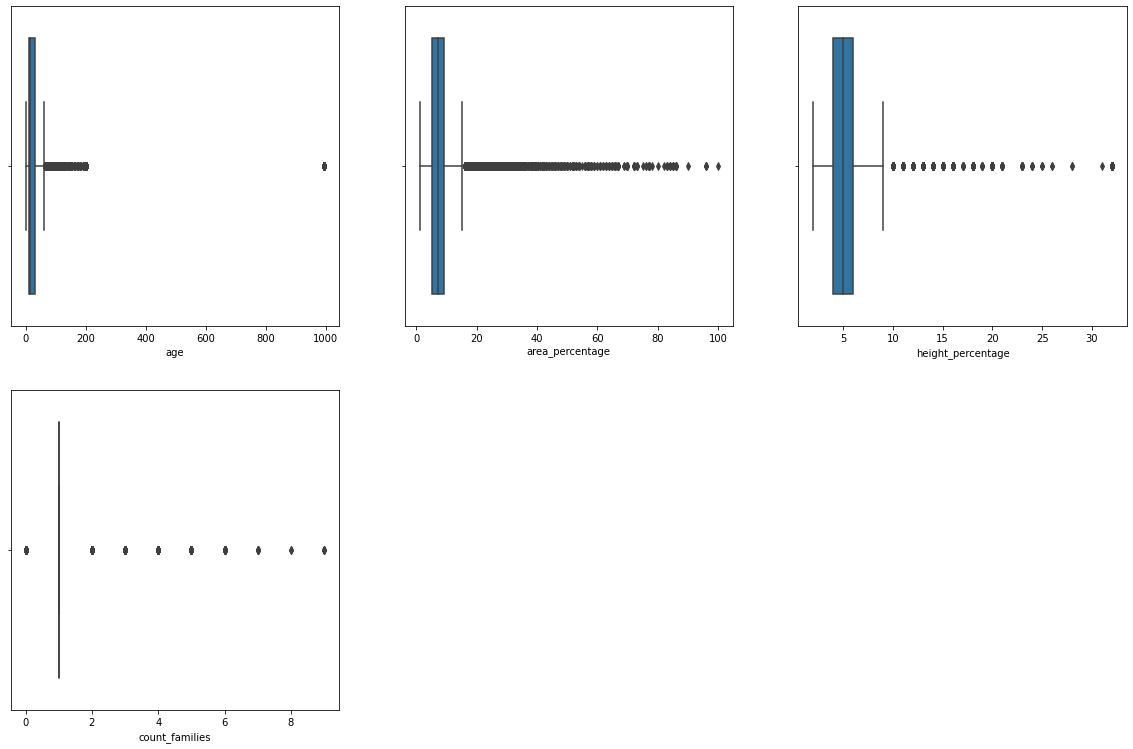

In [ ]:
outliners_cols=["age","area_percentage","height_percentage","count_families"]
q=1
plt.figure(figsize=(20,20))
for j in outliners_cols:
    plt.subplot(3,3,q)
    ax=sns.boxplot(df[j].dropna()p
    plt.xlabel(j)
    q+=1
plt.show()

**Preprocessing step**

In [ ]:
X  = df
X = X.drop(["damage_grade","building_id"],axis=1)
y = df["damage_grade"]
label_encoding_cols=['land_surface_condition', 'foundation_type', 'roof_type','ground_floor_type', 'other_floor_type', 'position','plan_configuration', 'legal_ownership_status']
for i in label_encoding_cols:
    X[i]=X[i].astype("category")
    X[i]=X[i].cat.codes
    
for j in label_encoding_cols:
    test[j]=test[j].astype("category")
    test[j]=test[j].cat.codes    

x_train, x_test,y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)


**12. Correlation against target**

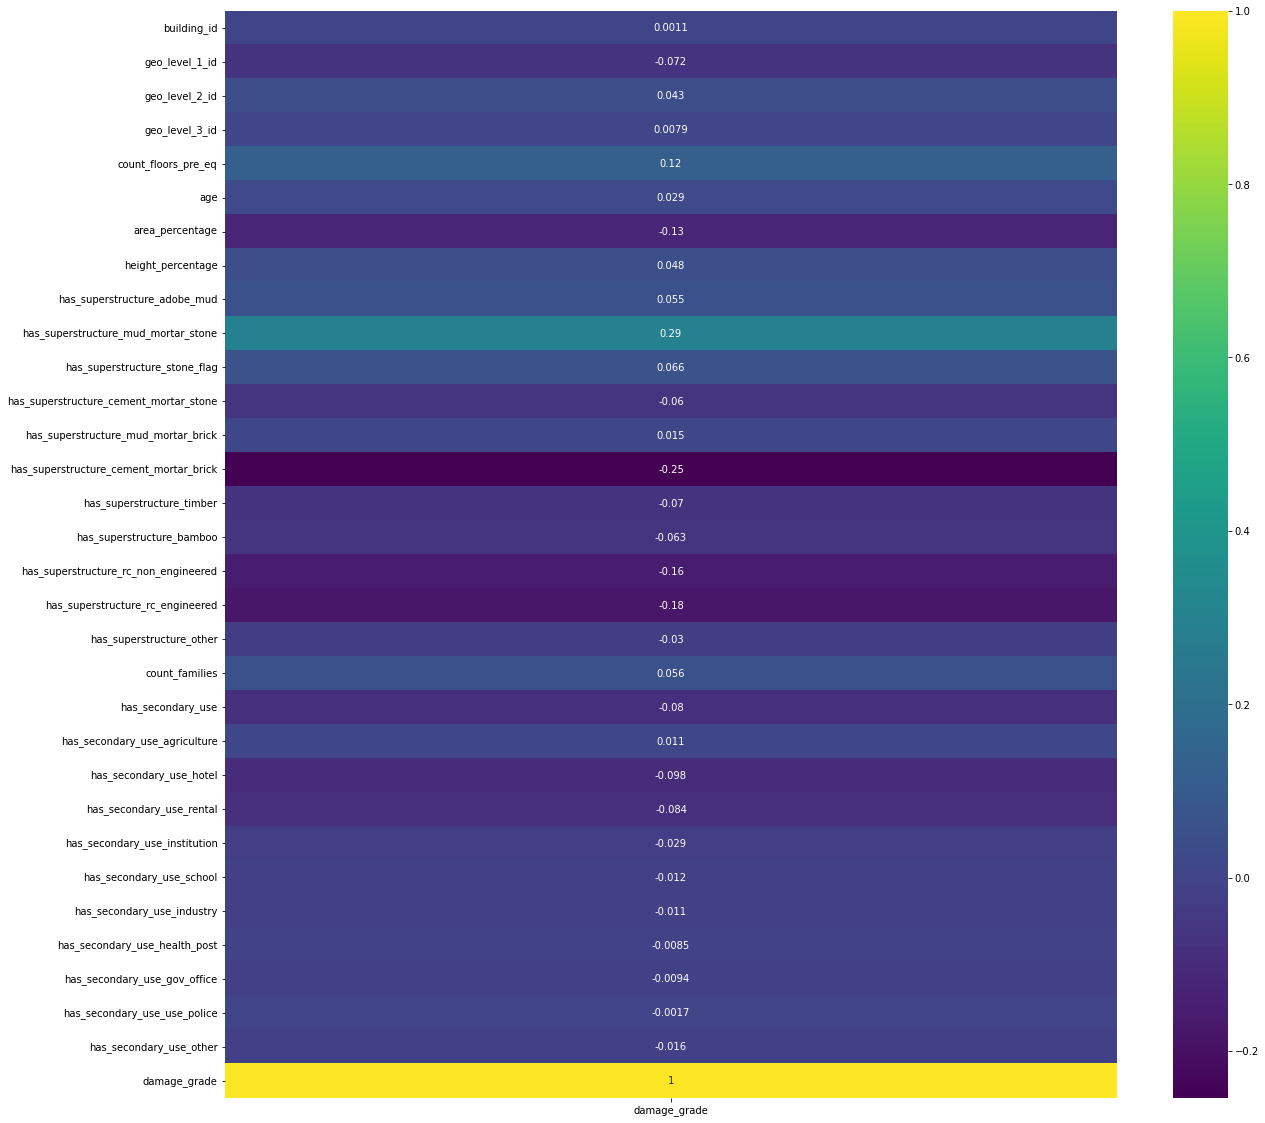

In [ ]:
plt.figure(figsize=(20,20))
cor=df.corr()["damage_grade"]
cor=pd.DataFrame(cor)
sns.heatmap(cor,annot=True,cmap="viridis")

**13. Correlation between features**

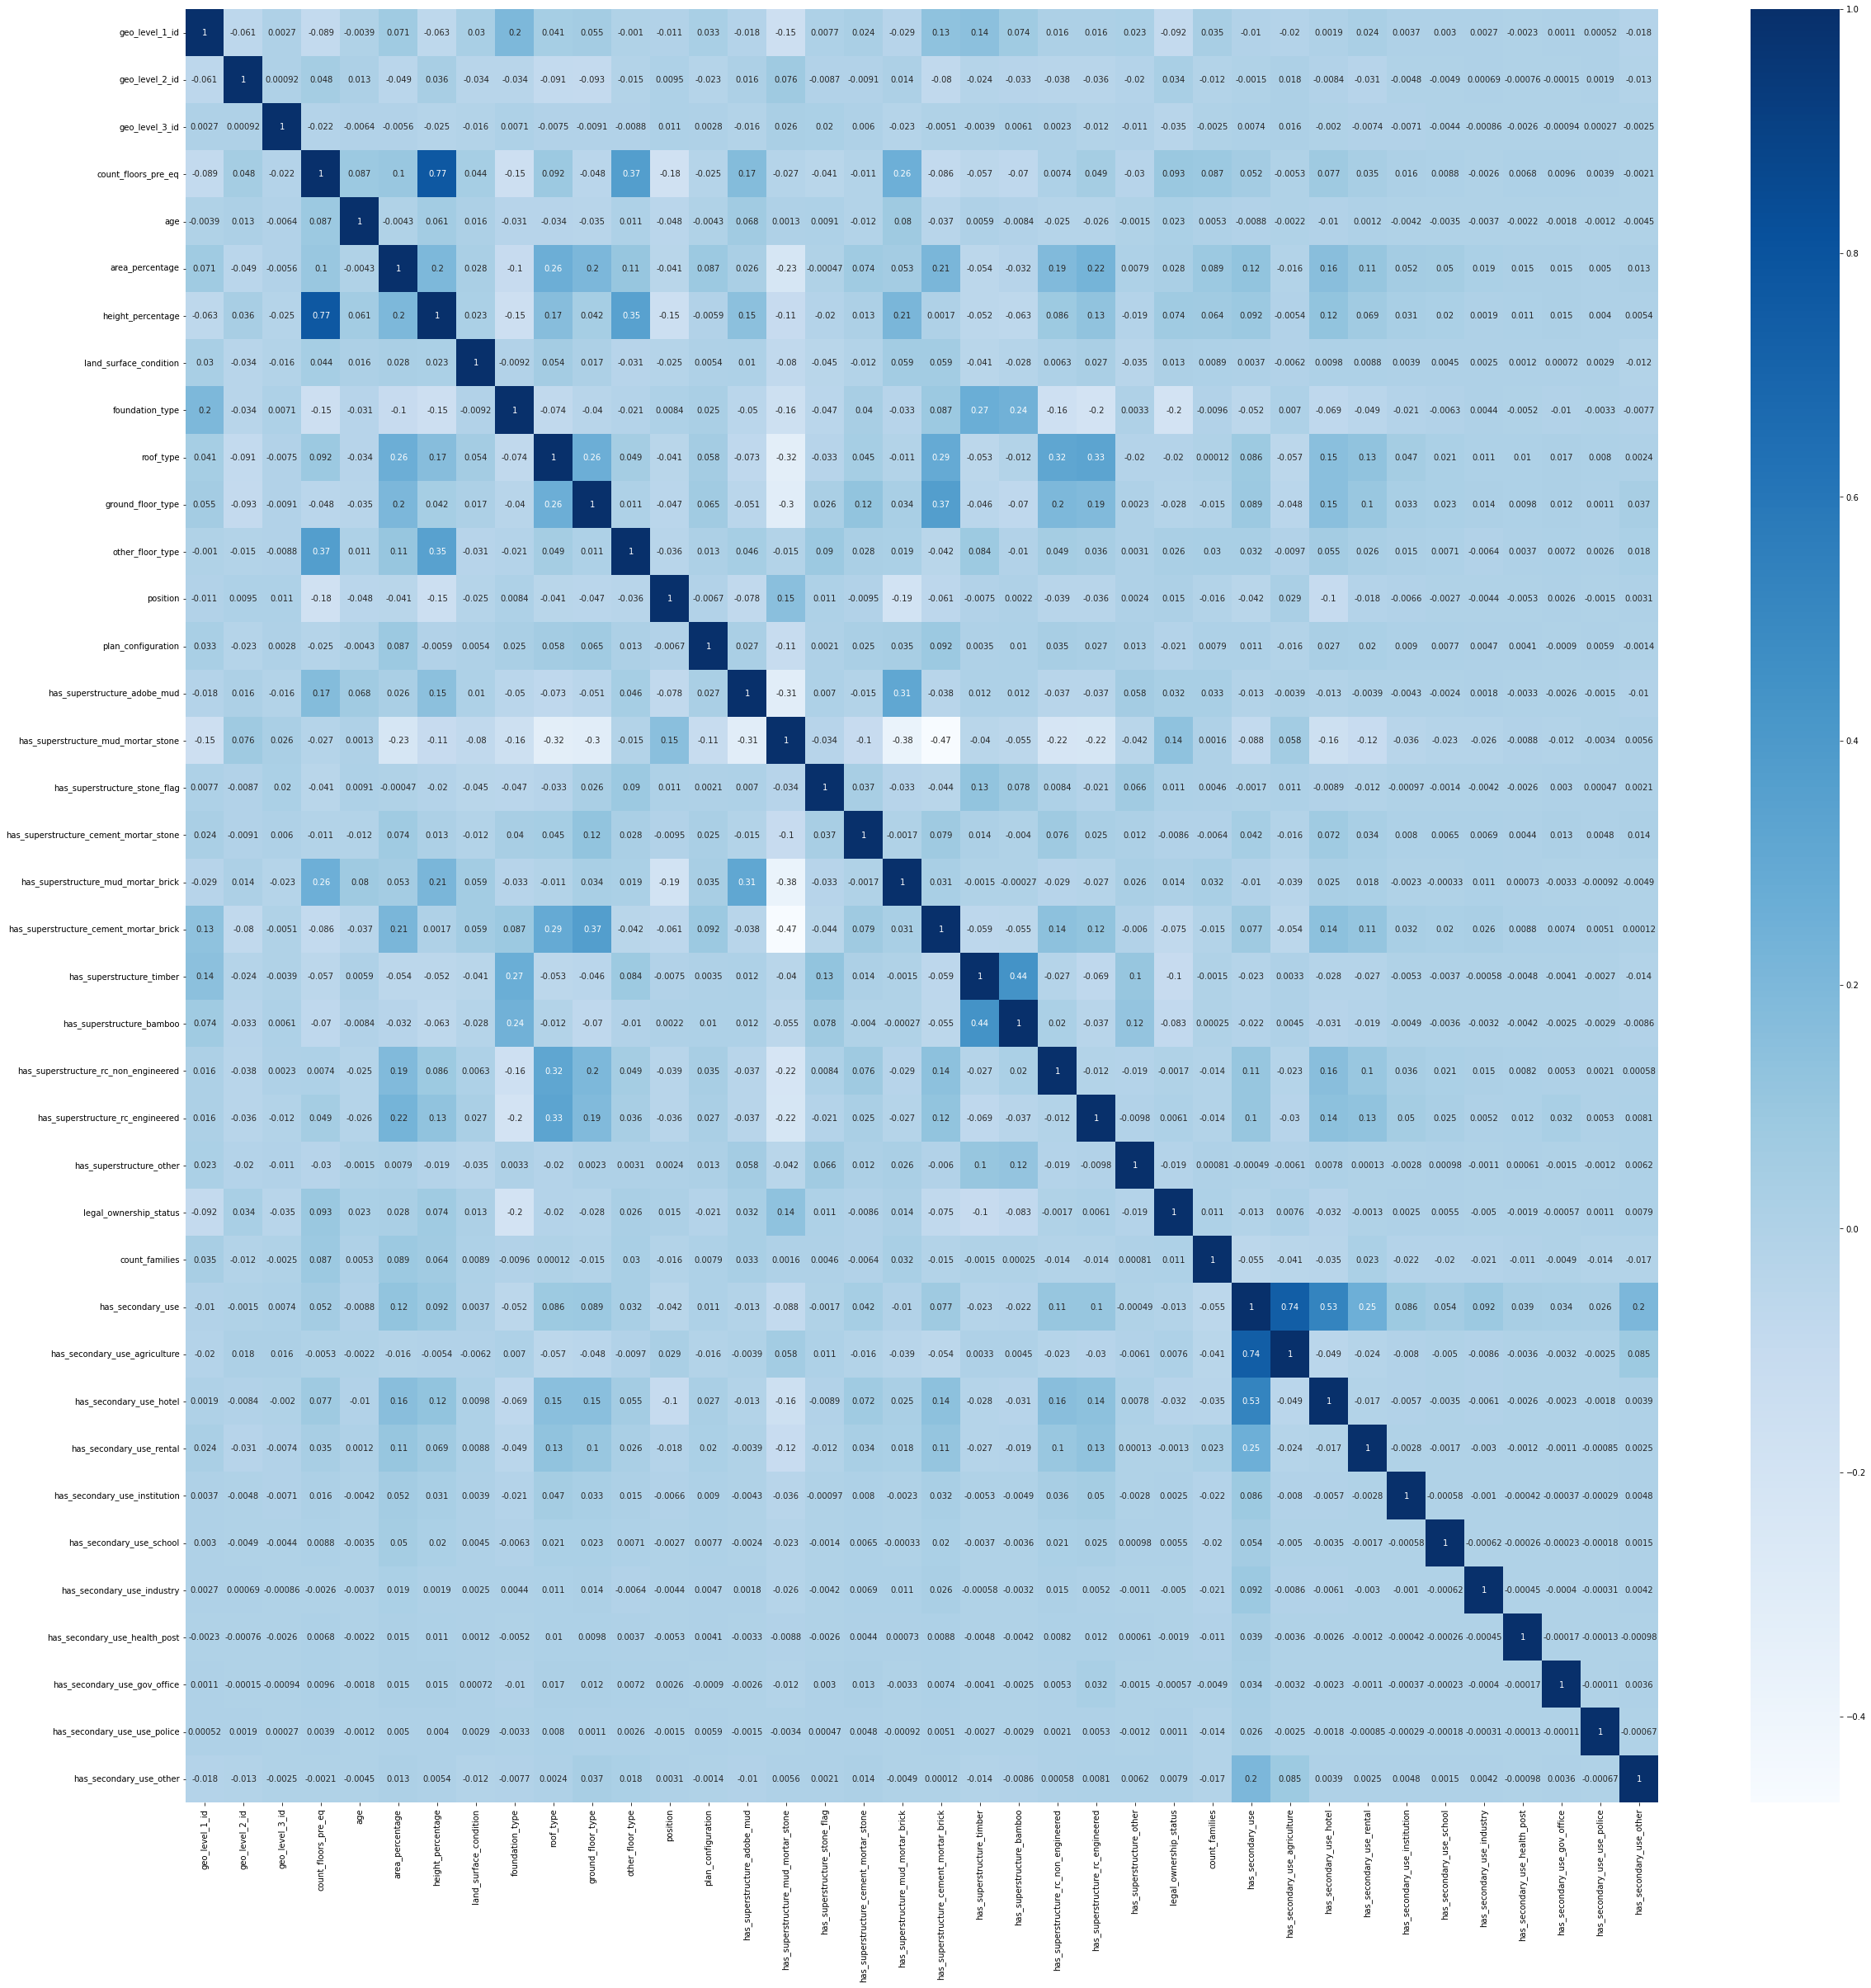

In [ ]:
corr=X.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr,annot=True,cmap="Blues")
plt.show()

**14. variance threshold**




In [ ]:
v_threshold=VarianceThreshold(threshold=0)
v_threshold.fit(X)
print(v_threshold.get_support())

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


**15. Information gain**



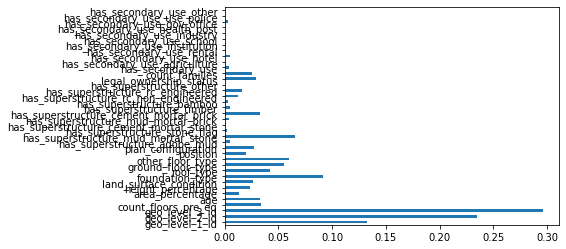

<Figure size 7200x7200 with 0 Axes>

In [ ]:
importances=mutual_info_classif(X,y)
feature_importances = pd.Series(importances,X.columns[0:len(X)-1])
feature_importances.plot(kind="barh")
plt.figure(figsize=(100,100))
plt.show()

**15. Random Forest Hyperparamter tuning using gridsearchCV**

In [ ]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X, y)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

**15.1. Feature importance + Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators = 300,random_state = 1, max_depth=30,n_jobs=-1)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

results = list(zip(X, rf.feature_importances_))
importance = pd.DataFrame(results, columns = ["Feature", "Importance"])
importance = importance.sort_values(by="Importance", ascending=False)
importance

,Feature,Importance
0,geo_level_1_id,0.160525
2,geo_level_3_id,0.131983
1,geo_level_2_id,0.124809
5,area_percentage,0.101436
4,age,0.101279
6,height_percentage,0.055260
8,foundation_type,0.029867
9,roof_type,0.028912
26,count_families,0.024618
12,position,0.023260


**15.2 Random Forest results**

In [ ]:
print("---------------------------------------------------------------------")
print("Accuracy Score for Random Forest :",accuracy_score(y_test,rf_pred))
print("---------------------------------------------------------------------")
print("\n")
print("classification stats for Random Forest Classifier :\n\n",classification_report(y_test, rf_pred))
print("---------------------------------------------------------------------")
print("Micro F1 Score:",f1_score(y_test, rf_pred, average='micro'))
print("---------------------------------------------------------------------")

---------------------------------------------------------------------
Accuracy Score for Random Forest : 0.726482607778055
---------------------------------------------------------------------


classification stats for Random Forest Classifier :

               precision    recall  f1-score   support

           1       0.68      0.45      0.54      4979
           2       0.72      0.85      0.78     29703
           3       0.75      0.59      0.66     17439

    accuracy                           0.73     52121
   macro avg       0.72      0.63      0.66     52121
weighted avg       0.73      0.73      0.72     52121

---------------------------------------------------------------------
Micro F1 Score: 0.726482607778055
---------------------------------------------------------------------


**15.3 Confusion matrix for RandomForestClassifier**

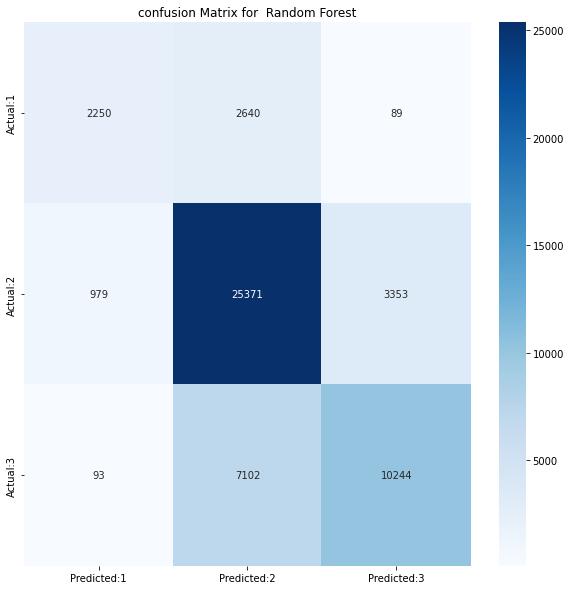

In [ ]:
cm=confusion_matrix(y_test,rf_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])                          
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')
plt.title("confusion Matrix for  Random Forest")
plt.show()

**16. Recursive Feature Elimination**


In [ ]:
svc = SVC(kernel="linear")
min_features_to_select = 5
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)
 
print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

**17. Forward/Backward Sequential Feature Selection**

In [ ]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
tic_fwd = time()
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=20, direction="forward"
).fit(X, y)
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=20, direction="backward"
).fit(X, y)
toc_bwd = time()

print(
    "Features selected by forward sequential selection: "
    f"{x_train.columns.values[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
print(
    "Features selected by backward sequential selection: "
    f"{x_train.columns.values[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

**18. Decision Tree Classifier**

In [ ]:
#Decision Tree
dt = DecisionTreeClassifier(max_features = None,
                            max_depth = 30,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=1)

model = dt.fit(x_train, y_train)

#Predictions - Decision Tree
dt_pred = model.predict(x_test)

print("---------------------------------------------------------------------")
print("Accuracy Score for Decision Tree :",accuracy_score(y_test,dt_pred))
print("---------------------------------------------------------------------")
print("\n")
print("classification stats for Decision Tree :\n\n",classification_report(y_test, dt_pred))
print("---------------------------------------------------------------------")
print("\n")
print("---------------------------------------------------------------------")
print("Micro F1 Score:",f1_score(y_test, dt_pred, average='micro'))
print("---------------------------------------------------------------------")

---------------------------------------------------------------------
Accuracy Score for Decision Tree : 0.7162180311198941
---------------------------------------------------------------------


classification stats for Decision Tree :

               precision    recall  f1-score   support

           1       0.60      0.46      0.52      4979
           2       0.72      0.83      0.77     29703
           3       0.73      0.60      0.66     17439

    accuracy                           0.72     52121
   macro avg       0.68      0.63      0.65     52121
weighted avg       0.71      0.72      0.71     52121

---------------------------------------------------------------------


---------------------------------------------------------------------
Micro F1 Score: 0.7162180311198941
---------------------------------------------------------------------


**18.1 Confusion matrix for DesicionTreeClassifier**

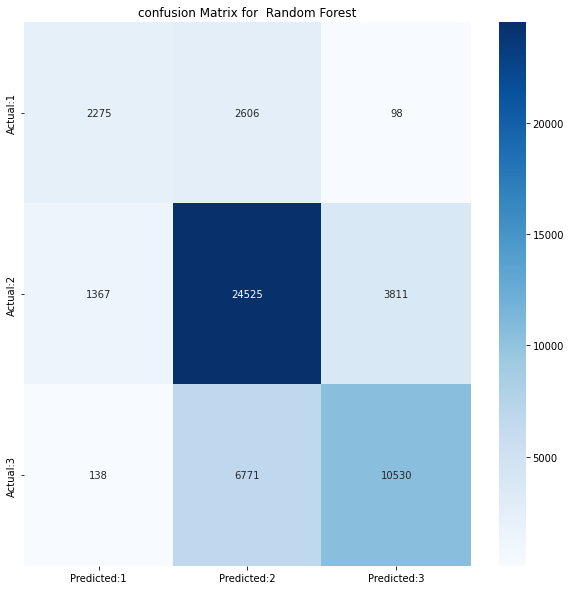

In [ ]:
cm=confusion_matrix(y_test,dt_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])                          
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')
plt.title("confusion Matrix for  Random Forest")
plt.show()

**19. XGBoost hyperparamter tuning** 

In [ ]:
param_grid = {
 "max_depth": [3, 4, 5, 7],
 "learning_rate": [0.1, 0.01, 0.05],
 "gamma": [0, 0.25, 1],
 "reg_lambda": [0, 1, 10],
 "scale_pos_weight": [1, 3, 5],
 "subsample": [0.8],
 "colsample_bytree": [0.5],
 }

model = XGBClassifier(objective="multi:softmax")
grid_cv = GridSearchCV(model, param_grid, n_jobs=-1, cv=3)
grid_cv.fit(x_train, y_train)
pred=grid_cv.predict(x_test)

print("Micro F1 Score:",f1_score(y_test, pred, average='micro'))

**20. XGBoost Results**

In [ ]:
xg_cl = XGBClassifier(n_estimators=2000,max_depth=6,random_state=0,n_jobs=-1)
# Fitting the model
xg_cl.fit(x_train, y_train)
# Getting the micro average f1_score 
print("The micro average f1_score for the xgb classifier is:")
f1_score(y_test, xg_cl.predict(x_test), average='micro')

print("---------------------------------------------------------------------")
print("Accuracy Score for Decision Tree :",accuracy_score(y_test,xg_cl.predict(x_test)))
print("---------------------------------------------------------------------")
print("\n")
print("classification stats for Decision Tree :\n\n",classification_report(y_test, xg_cl.predict(x_test)))
print("---------------------------------------------------------------------")
print("\n")
print("---------------------------------------------------------------------")
print("Micro F1 Score:",f1_score(y_test, xg_cl.predict(x_test), average='micro'))
print("---------------------------------------------------------------------")

The micro average f1_score for the xgb classifier is:
---------------------------------------------------------------------
Accuracy Score for Decision Tree : 0.7476640893305961
---------------------------------------------------------------------


classification stats for Decision Tree :

               precision    recall  f1-score   support

           1       0.69      0.53      0.60      4979
           2       0.75      0.85      0.80     29703
           3       0.76      0.64      0.69     17439

    accuracy                           0.75     52121
   macro avg       0.73      0.67      0.70     52121
weighted avg       0.75      0.75      0.74     52121

---------------------------------------------------------------------


---------------------------------------------------------------------
Micro F1 Score: 0.7476640893305961
---------------------------------------------------------------------


**20.1 Confusion matrix for XGBoostClassifier**

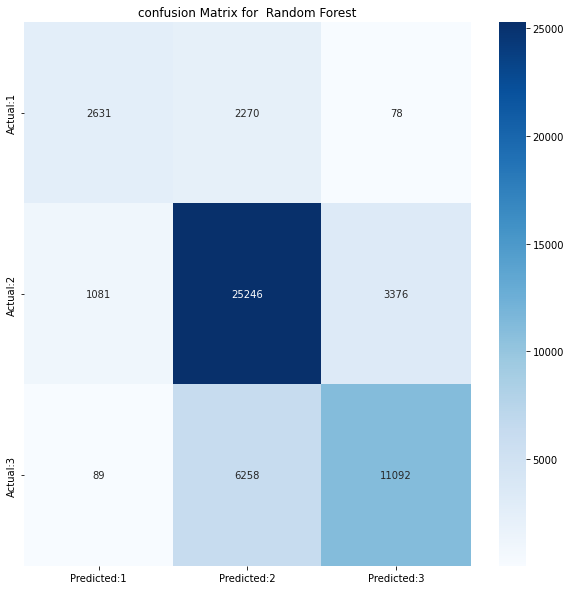

In [ ]:
cm=confusion_matrix(y_test,xg_cl.predict(x_test))
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])                          
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')
plt.title("confusion Matrix for  Random Forest")
plt.show()

**21. LightGBM hyperparamter tuning**

In [ ]:
fit_params = {"early_stopping_rounds": 30,
              "eval_metric": 'auc',
              "eval_set": [(x_test, y_test)],
              'eval_names': ['valid'],
              # 'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
              'verbose': 100,
              'categorical_feature': 'auto'}

param_test = {'num_leaves': sp_randint(6, 50),
              'min_child_samples': sp_randint(100, 500),
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8),
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

n_HP_points_to_test = 100
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, verbose=0, metric='None', n_jobs=-1, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test,
    n_iter=n_HP_points_to_test,
    # scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=10)

gs.fit(x_train, y_train.values.ravel())
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

***22. LightGBM results***

In [ ]:
LGBM = lgb.LGBMClassifier(colsample_bytree=0.7076074093370144,min_child_samples=105,min_child_weight=0.00001,num_leaves=26,reg_alpha=5,reg_lambda=5,subsample=0.7468773130235173)
LGBM.fit(x_train, y_train)
LGBM_pred=LGBM.predict(x_test)
print("The micro average f1_score for the LightBGM classifier is:")
f1_score(y_test, LGBM_pred, average='micro')

print("---------------------------------------------------------------------")
print("Accuracy Score for Decision Tree :",accuracy_score(y_test,LGBM_pred))
print("---------------------------------------------------------------------")
print("\n")
print("classification stats for Decision Tree :\n\n",classification_report(y_test, LGBM_pred))
print("---------------------------------------------------------------------")
print("\n")
print("---------------------------------------------------------------------")
print("Micro F1 Score:",f1_score(y_test, LGBM_pred, average='micro'))
print("---------------------------------------------------------------------")

The micro average f1_score for the LightBGM classifier is:
---------------------------------------------------------------------
Accuracy Score for Decision Tree : 0.7026534410314461
---------------------------------------------------------------------


classification stats for Decision Tree :

               precision    recall  f1-score   support

           1       0.65      0.40      0.50      4979
           2       0.70      0.85      0.77     29703
           3       0.73      0.54      0.62     17439

    accuracy                           0.70     52121
   macro avg       0.69      0.60      0.63     52121
weighted avg       0.70      0.70      0.69     52121

---------------------------------------------------------------------


---------------------------------------------------------------------
Micro F1 Score: 0.7026534410314461
---------------------------------------------------------------------


**22.1 Confusion matrix for LightGBMClassifier**

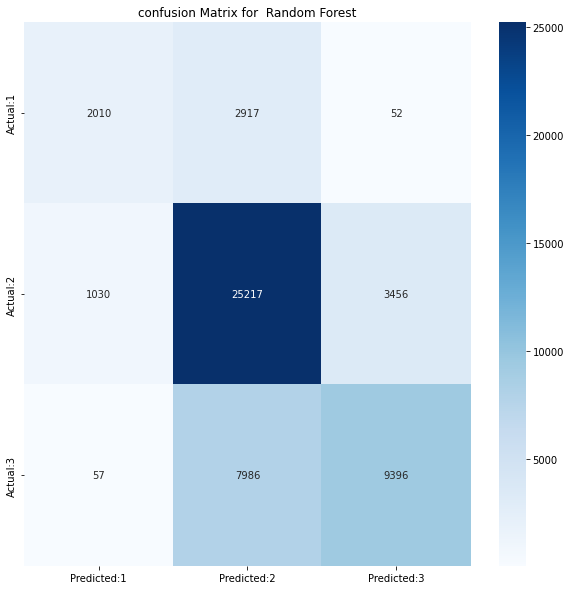

In [ ]:
cm=confusion_matrix(y_test,LGBM_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])                          
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')
plt.title("confusion Matrix for  Random Forest")
plt.show()

**23. SVM**

In [ ]:
svmClassifier = SVC(C=100.0)
svmClassifier.fit(x_train,y_train)
y_pred_svm = svmClassifier.predict(x_test)
print("Micro F1 Score:",f1_score(y_test, y_pred_svm, average='micro'))

print("---------------------------------------------------------------------")
print("Accuracy Score for Decision Tree :",accuracy_score(y_test,y_pred_svm))
print("---------------------------------------------------------------------")
print("\n")
print("classification stats for Decision Tree :\n\n",classification_report(y_test, y_pred_svm))
print("---------------------------------------------------------------------")
print("\n")
print("---------------------------------------------------------------------")
print("Micro F1 Score:",f1_score(y_test, y_pred_svm, average='micro'))
print("---------------------------------------------------------------------")

Micro F1 Score: 0.5698854588361697
---------------------------------------------------------------------
Accuracy Score for Decision Tree : 0.5698854588361697
---------------------------------------------------------------------


classification stats for Decision Tree :

               precision    recall  f1-score   support

           1       0.00      0.00      0.00      4979
           2       0.57      1.00      0.73     29703
           3       0.00      0.00      0.00     17439

    accuracy                           0.57     52121
   macro avg       0.19      0.33      0.24     52121
weighted avg       0.32      0.57      0.41     52121

---------------------------------------------------------------------


---------------------------------------------------------------------
Micro F1 Score: 0.5698854588361697
---------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**23.1 Confusion matrix for SVM-Classifier**

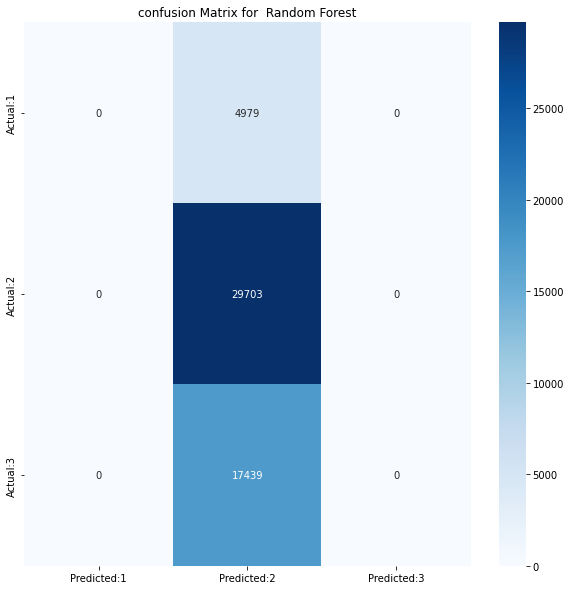

In [ ]:
cm=confusion_matrix(y_test,y_pred_svm)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])                          
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')
plt.title("confusion Matrix for  Random Forest")
plt.show()

**24. AdaBoost Classifier**

In [ ]:
# Instantiating an AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=500,)
# Fitting the model
ada.fit(x_train, y_train)
# Getting the micro average f1_score
print("The micro average f1_score for the adaboost classifier is:")
f1_score(y_test, ada.predict(x_test), average='micro')

print("---------------------------------------------------------------------")
print("Accuracy Score for Decision Tree :",accuracy_score(y_test,ada.predict(x_test)))
print("---------------------------------------------------------------------")
print("\n")
print("classification stats for Decision Tree :\n\n",classification_report(y_test, ada.predict(x_test)))
print("---------------------------------------------------------------------")
print("\n")
print("---------------------------------------------------------------------")
print("Micro F1 Score:",f1_score(y_test, ada.predict(x_test), average='micro'))
print("---------------------------------------------------------------------")

The micro average f1_score for the adaboost classifier is:
---------------------------------------------------------------------
Accuracy Score for Decision Tree : 0.6679457416396463
---------------------------------------------------------------------


classification stats for Decision Tree :

               precision    recall  f1-score   support

           1       0.58      0.39      0.47      4979
           2       0.67      0.82      0.74     29703
           3       0.68      0.48      0.56     17439

    accuracy                           0.67     52121
   macro avg       0.64      0.57      0.59     52121
weighted avg       0.67      0.67      0.65     52121

---------------------------------------------------------------------


---------------------------------------------------------------------
Micro F1 Score: 0.6679457416396463
---------------------------------------------------------------------


**24.1 Confusion matrix for AdaBoostClassifier**

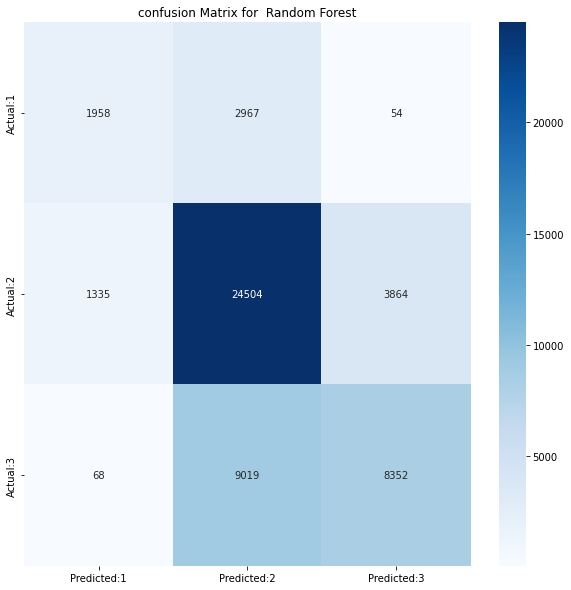

In [ ]:
cm=confusion_matrix(y_test,ada.predict(x_test))
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])                          
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')
plt.title("confusion Matrix for  Random Forest")
plt.show()

**25. KNN optimal number of neighbours** 

In [ ]:
mean_acc = np.zeros(20)
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = accuracy_score(y_test, yhat)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

**26. KNN hyperparamter tuning**

In [ ]:
grid_params = { 'n_neighbors' : [6,7,8,9,10,11,12],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 10, cv=3, n_jobs = 4 )
g_res = gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

**27. KNN Results**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12,metric="manhattan",weights="distance")
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
f1_score(y_test, knn_pred, average='micro')

print("---------------------------------------------------------------------")
print("Accuracy Score for Decision Tree :",accuracy_score(y_test,knn_pred))
print("---------------------------------------------------------------------")
print("\n")
print("classification stats for Decision Tree :\n\n",classification_report(y_test,knn_pred))
print("---------------------------------------------------------------------")
print("\n")
print("---------------------------------------------------------------------")
print("Micro F1 Score:",f1_score(y_test, knn_pred, average='micro'))
print("---------------------------------------------------------------------")

---------------------------------------------------------------------
Accuracy Score for Decision Tree : 0.7177337349628748
---------------------------------------------------------------------


classification stats for Decision Tree :

               precision    recall  f1-score   support

           1       0.63      0.48      0.55      4979
           2       0.74      0.80      0.77     29703
           3       0.70      0.64      0.67     17439

    accuracy                           0.72     52121
   macro avg       0.69      0.64      0.66     52121
weighted avg       0.71      0.72      0.71     52121

---------------------------------------------------------------------


---------------------------------------------------------------------
Micro F1 Score: 0.717733734962875
---------------------------------------------------------------------


**27.1 Confusion matrix for KNN-Classifier**

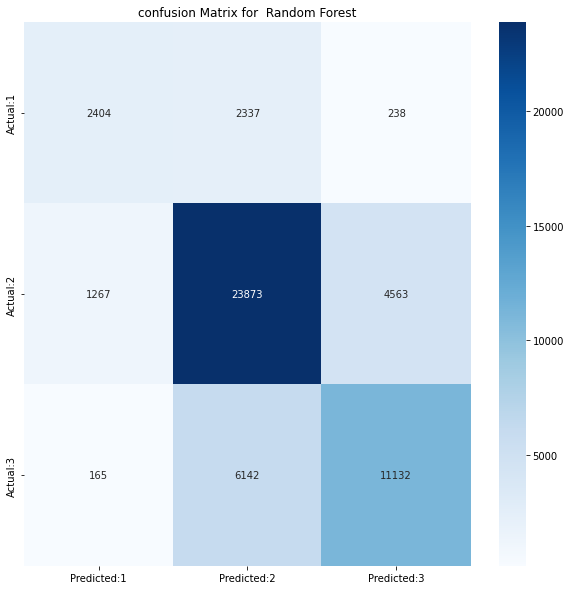

In [ ]:
cm=confusion_matrix(y_test,knn_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])                          
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')
plt.title("confusion Matrix for  Random Forest")
plt.show()

**28. Voting Classifier - (XGBoost-Random Forest-Decision Tree-AdaBoost-LightGBM-KNN)**

In [ ]:
clf_voting = VotingClassifier(
                    estimators=[
                                ('xgboost', xg_cl),
                                ('random forest', rf),
                                ('adaboost', ada),
                                ('decision Tree', dt),
                                ('lightGBM', LGBM),
                                ('KNN',knn)],
                     voting='soft')
print("Step completed!")

clf_voting.fit(x_train, y_train)
clf_pred = clf_voting.predict(x_test)
# Getting the micro average f1_score
print("The micro average f1_score for the Voting classifier is:")
f1_score(y_test, clf_pred, average='micro')

print("---------------------------------------------------------------------")
print("Accuracy Score for Decision Tree :",accuracy_score(y_test,clf_pred))
print("---------------------------------------------------------------------")
print("\n")
print("classification stats for Decision Tree :\n\n",classification_report(y_test,clf_pred))
print("---------------------------------------------------------------------")
print("\n")
print("---------------------------------------------------------------------")
print("Micro F1 Score:",f1_score(y_test, clf_pred, average='micro'))
print("---------------------------------------------------------------------")

Step completed!
The micro average f1_score for the Voting classifier is:
---------------------------------------------------------------------
Accuracy Score for Decision Tree : 0.7455152433759905
---------------------------------------------------------------------


classification stats for Decision Tree :

               precision    recall  f1-score   support

           1       0.72      0.47      0.57      4979
           2       0.74      0.87      0.80     29703
           3       0.77      0.62      0.69     17439

    accuracy                           0.75     52121
   macro avg       0.74      0.65      0.68     52121
weighted avg       0.75      0.75      0.74     52121

---------------------------------------------------------------------


---------------------------------------------------------------------
Micro F1 Score: 0.7455152433759905
---------------------------------------------------------------------


**28.1 Confusion matrix for VotingClassifier**

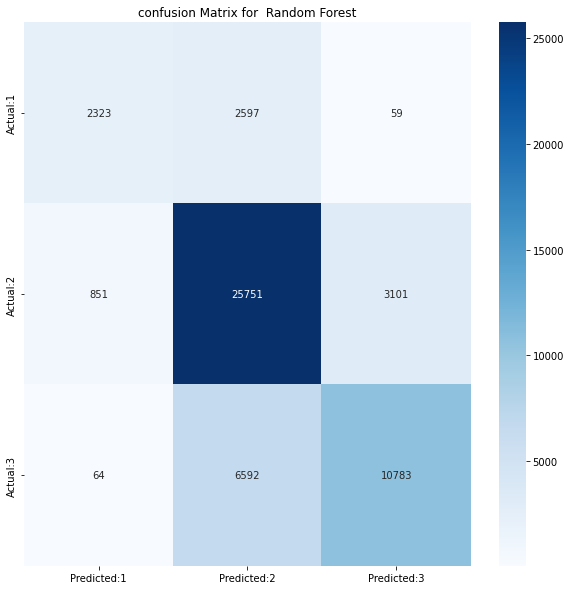

In [ ]:
cm=confusion_matrix(y_test,clf_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])                          
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')
plt.title("confusion Matrix for  Random Forest")
plt.show()

**SUBMISSIONS SECTION - model must be fitted before running predictions!**

In [ ]:
test = test.drop(["building_id"],axis=1)
submission = pd.read_csv('submission_format.csv')
submission = pd.DataFrame()
submission["building_id"] = test_building_id

**1. Random Forest Submission**

In [ ]:
pred = rf.predict(test)
submission["damage_grade"] = pred
submission.head()
submission.to_csv("submission_random_forest.csv", index=False)

**2. Decision Tree Submission**

In [ ]:
pred = dt.predict(test)
submission["damage_grade"] = pred
submission.head()
submission.to_csv("submission_decision_tree.csv", index=False)

**3. XGBoost Submission**

In [ ]:
pred = xg_cl.predict(test)
submission["damage_grade"] = pred
submission.head()
submission.to_csv("submission_xgboost.csv", index=False)

**4. LightGBM Submission**

In [ ]:
pred = LGBM.predict(test)
submission["damage_grade"] = pred
submission.head()
submission.to_csv("submission_light_gbm.csv", index=False)

**5. SVM Submission**

In [ ]:
pred = svmClassifier.predict(test)
submission["damage_grade"] = pred
submission.head()
submission.to_csv("submission_svm_model.csv", index=False)

**6. AdaBoost Submission**

In [ ]:
pred = ada.predict(test)
submission["damage_grade"] = pred
submission.head()
submission.to_csv("submission_ada_boost.csv", index=False)

**7. KNN Submission**

In [ ]:
pred = knn.predict(test)
submission["damage_grade"] = pred
submission.head()
submission.to_csv("submission_knn.csv", index=False)

**8. Voting submission**

In [ ]:
pred = clf_voting.predict(test)
submission["damage_grade"] = pred
submission.head()
submission.to_csv("submission_voting.csv", index=False)